In [1]:
### IMPORT BIBLIOTECAS

import requests
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import folium
import json
from tqdm.auto import tqdm
from datetime import datetime

C:\Users\Matheus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Resquest no site da ANAC
request = requests.get('https://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos')
request

<Response [200]>

In [3]:
# Obtendo links para acessar cada mês de voos
soup = BeautifulSoup(request.content)
a = soup.find_all('a', attrs = {'class':'internal-link'})
links = [i['href'] for i in a if '2019' in i['href']]

In [4]:
# Extraindo csv dos links e unindo em única base de dados
# o try e except é necessário neste caso pois um dos arquivos é separado
# por '\t', causando erro ao tentar separar por ';'

dfs =[]
for i in tqdm(range(len(links))):
    try:
        x_i = pd.read_csv(links[i], sep = ';', encoding = 'mbcs')
        x_i.columns = ['sg_empresa_icao', 'nr_voo', 'cd_di', 'cd_tipo_linha', 'sg_icao_origem',
           'sg_icao_destino', 'dt_partida_prevista', 'dt_partida_real',
           'dt_chegada_prevista', 'dt_chegada_real', 'situacao',
           'cd_justificativa']
        dfs.append(x_i)
    except:
        x_i = pd.read_csv(links[i], sep = '\\t', encoding = 'mbcs')
        x_i.columns = ['sg_empresa_icao', 'nr_voo', 'cd_di', 'cd_tipo_linha', 'sg_icao_origem',
           'sg_icao_destino', 'dt_partida_prevista', 'dt_partida_real',
           'dt_chegada_prevista', 'dt_chegada_real', 'situacao',
           'cd_justificativa']
        dfs.append(x_i)        
data = pd.concat(dfs)

C:\Users\Matheus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [5]:
data = data.reset_index(drop = True)
data

,sg_empresa_icao,nr_voo,cd_di,cd_tipo_linha,sg_icao_origem,sg_icao_destino,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,situacao,cd_justificativa
0,AAF,35,0,I,LFPO,SBKP,25/01/2019 06:15,25/01/2019 06:15,25/01/2019 18:15,25/01/2019 18:15,REALIZADO,NaN
1,AAF,35,0,I,LFPO,SBKP,27/01/2019 06:15,27/01/2019 06:15,27/01/2019 18:15,27/01/2019 18:15,REALIZADO,NaN
2,AAF,35,0,I,LFPO,SBKP,29/01/2019 06:15,29/01/2019 06:15,29/01/2019 18:15,29/01/2019 18:15,REALIZADO,NaN
3,AAF,36,0,I,SBKP,LFPO,25/01/2019 20:15,25/01/2019 20:15,26/01/2019 07:45,26/01/2019 07:45,REALIZADO,NaN
4,AAF,36,0,I,SBKP,LFPO,27/01/2019 20:15,27/01/2019 20:15,28/01/2019 07:45,28/01/2019 07:45,REALIZADO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
982986,GLO,1652,0,N,SBSP,SBIL,25/12/2019 10:45,25/12/2019 10:54,25/12/2019 12:50,25/12/2019 13:02,REALIZADO,NaN
982987,GLO,1633,0,N,SBPL,SBGR,31/12/2019 02:45,31/12/2019 02:42,31/12/2019 05:30,31/12/2019 05:39,REALIZADO,NaN
982988,GLO,2013,0,N,SBNF,SBGL,06/12/2019 18:55,06/12/2019 19:32,06/12/2019 20:20,06/12/2019 20:52,REALIZADO,RI
982989,GLO,4034,0,N,SBRJ,SBBR,10/12/2019 17:00,10/12/2019 17:03,10/12/2019 18:50,10/12/2019 18:43,REALIZADO,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982991 entries, 0 to 982990
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   sg_empresa_icao      982991 non-null  object
 1   nr_voo               982699 non-null  object
 2   cd_di                982754 non-null  object
 3   cd_tipo_linha        982991 non-null  object
 4   sg_icao_origem       982991 non-null  object
 5   sg_icao_destino      982991 non-null  object
 6   dt_partida_prevista  982976 non-null  object
 7   dt_partida_real      965183 non-null  object
 8   dt_chegada_prevista  982976 non-null  object
 9   dt_chegada_real      965183 non-null  object
 10  situacao             982991 non-null  object
 11  cd_justificativa     330153 non-null  object
dtypes: object(12)
memory usage: 90.0+ MB


In [7]:
data.describe().T

,count,unique,top,freq
sg_empresa_icao,982991,63,AZU,302316
nr_voo,982699,11832,248,1049
cd_di,982754,22,0,498465
cd_tipo_linha,982991,7,N,814385
sg_icao_origem,982991,361,SBGR,138257
sg_icao_destino,982991,362,SBGR,138586
dt_partida_prevista,982976,125650,20/12/2019 06:00,43
dt_partida_real,965183,394030,20/08/2019 06:00,20
dt_chegada_prevista,982976,125594,29/11/2019 20:25,29
dt_chegada_real,965183,403532,28/10/2019 20:25,18


In [8]:
# pegando uma tabela com os códigos de todos os aeroportos (ANAC), assim será possível adicionar o nome das cidades ao dataframe

icao = pd.read_excel("https://www.anac.gov.br/assuntos/dados-e-estatisticas/vra/glossario_de_aerodromo.xls", encoding ='latin-1', skiprows = 3)
icao.head()

,Unnamed: 0,Sigla OACI,Descrição,Cidade,UF,País,Continente
0,NaN,1AON,OUROLANDIA DO NORTE,OURILANDIA DO NORTE,PA,BRASIL,AMERICA DO SUL
1,NaN,2NHT,HOTEL TRANSAMÉRICA,UNA,BA,BRASIL,AMERICA DO SUL
2,NaN,6ASO,SORRISO,SORRISO,MT,BRASIL,AMERICA DO SUL
3,NaN,CYMX,MONTREAL-MIRABEL INTERNATIONAL AIRPORT,MIRABEL,NaN,CANADA,AMERICA DO NORTE
4,NaN,CYQB,QUEBEC CITY JEAN LESAGE INTERNATIONAL AIRPORT,QUEBEC JEAN LESAGE INTL,NaN,CANADA,AMERICA DO NORTE


In [9]:
# criando dicionario ICAO:cidade

icaodict = {}
for i in range(len(icao)):
    icaodict.update({icao.loc[i]['Sigla OACI']:icao.loc[i]['Cidade']})
    
# criando dicionario CIDADE:PAÌS
paisdict = {}
for i in range(len(icao)):
    paisdict.update({icao.loc[i]['Cidade']:icao.loc[i]['País']})

In [10]:
# adicionando novas colunas ao dataframe
data['cidade_origem'] = data['sg_icao_origem'].apply(lambda x: icaodict.get(x))
data['cidade_destino'] = data['sg_icao_destino'].apply(lambda x: icaodict.get(x))
data['pais_origem'] = data['cidade_origem'].apply(lambda x: paisdict.get(x))
data['pais_destino'] = data['cidade_destino'].apply(lambda x: paisdict.get(x))
data

,sg_empresa_icao,nr_voo,cd_di,cd_tipo_linha,sg_icao_origem,sg_icao_destino,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,situacao,cd_justificativa,cidade_origem,cidade_destino,pais_origem,pais_destino
0,AAF,35,0,I,LFPO,SBKP,25/01/2019 06:15,25/01/2019 06:15,25/01/2019 18:15,25/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL
1,AAF,35,0,I,LFPO,SBKP,27/01/2019 06:15,27/01/2019 06:15,27/01/2019 18:15,27/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL
2,AAF,35,0,I,LFPO,SBKP,29/01/2019 06:15,29/01/2019 06:15,29/01/2019 18:15,29/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL
3,AAF,36,0,I,SBKP,LFPO,25/01/2019 20:15,25/01/2019 20:15,26/01/2019 07:45,26/01/2019 07:45,REALIZADO,NaN,CAMPINAS,PARIS,BRASIL,FRANCA
4,AAF,36,0,I,SBKP,LFPO,27/01/2019 20:15,27/01/2019 20:15,28/01/2019 07:45,28/01/2019 07:45,REALIZADO,NaN,CAMPINAS,PARIS,BRASIL,FRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982986,GLO,1652,0,N,SBSP,SBIL,25/12/2019 10:45,25/12/2019 10:54,25/12/2019 12:50,25/12/2019 13:02,REALIZADO,NaN,SÃO PAULO,ILHÉUS,BRASIL,BRASIL
982987,GLO,1633,0,N,SBPL,SBGR,31/12/2019 02:45,31/12/2019 02:42,31/12/2019 05:30,31/12/2019 05:39,REALIZADO,NaN,PETROLINA,GUARULHOS,BRASIL,BRASIL
982988,GLO,2013,0,N,SBNF,SBGL,06/12/2019 18:55,06/12/2019 19:32,06/12/2019 20:20,06/12/2019 20:52,REALIZADO,RI,NAVEGANTES,RIO DE JANEIRO,BRASIL,BRASIL
982989,GLO,4034,0,N,SBRJ,SBBR,10/12/2019 17:00,10/12/2019 17:03,10/12/2019 18:50,10/12/2019 18:43,REALIZADO,NaN,RIO DE JANEIRO,BRASÍLIA,BRASIL,BRASIL


In [11]:
# # pegando uma tabela com os códigos de todas as empresas aereas (ANAC), assim será possível adicionar o nome das empresas ao dataframe


empresas = pd.read_excel("https://www.anac.gov.br/assuntos/dados-e-estatisticas/vra/glossario_de_empresas_aereas.xls", encoding ='latin-1', skiprows = 3)
empresas

#criando dicionario CODDIGOEMPRESA:NOMEEMPRESA
empdict = {}
for i in range(len(empresas)):
    empdict.update({empresas.loc[i]['Sigla OACI']:empresas.loc[i]['Nome Empresas']})
    
empdict

# criando nova coluna no datafframe
data['empresa_aerea'] = data['sg_empresa_icao'].apply(lambda x: empdict.get(x))
data

,sg_empresa_icao,nr_voo,cd_di,cd_tipo_linha,sg_icao_origem,sg_icao_destino,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,situacao,cd_justificativa,cidade_origem,cidade_destino,pais_origem,pais_destino,empresa_aerea
0,AAF,35,0,I,LFPO,SBKP,25/01/2019 06:15,25/01/2019 06:15,25/01/2019 18:15,25/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None
1,AAF,35,0,I,LFPO,SBKP,27/01/2019 06:15,27/01/2019 06:15,27/01/2019 18:15,27/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None
2,AAF,35,0,I,LFPO,SBKP,29/01/2019 06:15,29/01/2019 06:15,29/01/2019 18:15,29/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None
3,AAF,36,0,I,SBKP,LFPO,25/01/2019 20:15,25/01/2019 20:15,26/01/2019 07:45,26/01/2019 07:45,REALIZADO,NaN,CAMPINAS,PARIS,BRASIL,FRANCA,None
4,AAF,36,0,I,SBKP,LFPO,27/01/2019 20:15,27/01/2019 20:15,28/01/2019 07:45,28/01/2019 07:45,REALIZADO,NaN,CAMPINAS,PARIS,BRASIL,FRANCA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982986,GLO,1652,0,N,SBSP,SBIL,25/12/2019 10:45,25/12/2019 10:54,25/12/2019 12:50,25/12/2019 13:02,REALIZADO,NaN,SÃO PAULO,ILHÉUS,BRASIL,BRASIL,GOL
982987,GLO,1633,0,N,SBPL,SBGR,31/12/2019 02:45,31/12/2019 02:42,31/12/2019 05:30,31/12/2019 05:39,REALIZADO,NaN,PETROLINA,GUARULHOS,BRASIL,BRASIL,GOL
982988,GLO,2013,0,N,SBNF,SBGL,06/12/2019 18:55,06/12/2019 19:32,06/12/2019 20:20,06/12/2019 20:52,REALIZADO,RI,NAVEGANTES,RIO DE JANEIRO,BRASIL,BRASIL,GOL
982989,GLO,4034,0,N,SBRJ,SBBR,10/12/2019 17:00,10/12/2019 17:03,10/12/2019 18:50,10/12/2019 18:43,REALIZADO,NaN,RIO DE JANEIRO,BRASÍLIA,BRASIL,BRASIL,GOL


In [12]:
# pegando uma tabela com as coordenadas de todos os aeroportos (ANAC), assim será possível adicionar as coordenadas dos aeroportos ao dataframe
# visualizando a tabela de coordenadas

airports = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat", header = None)
airports.columns = ['id','aeroporto','cidade','país','cod_aero','icao','lat','lon','a','b','c','d','e','f']
airports[airports['país'].isin(['Brazil'])].head()

,id,aeroporto,cidade,país,cod_aero,icao,lat,lon,a,b,c,d,e,f
2392,2518,Conceição do Araguaia Airport,Conceicao Do Araguaia,Brazil,CDJ,SBAA,-8.348350,-49.301498,653,-3,S,America/Belem,airport,OurAirports
2393,2519,Campo Délio Jardim de Mattos Airport,Rio De Janeiro,Brazil,\N,SBAF,-22.875099,-43.384701,110,-3,S,America/Sao_Paulo,airport,OurAirports
2394,2520,Amapá Airport,Amapa,Brazil,\N,SBAM,2.077510,-50.858200,45,-3,S,America/Fortaleza,airport,OurAirports
2395,2521,Araraquara Airport,Araracuara,Brazil,AQA,SBAQ,-21.812000,-48.132999,2334,-3,S,America/Sao_Paulo,airport,OurAirports
2396,2522,Santa Maria Airport,Aracaju,Brazil,AJU,SBAR,-10.984000,-37.070301,23,-3,S,America/Fortaleza,airport,OurAirports


In [13]:
# criando dicionario ICAO:LATITUDE
latdict = {}
for i in range(len(airports)):
    latdict.update({airports.loc[i]['icao']:airports.loc[i]['lat']})
    
latdict

#criando novas colunas no dataframe
data['latitude_origem'] = data['sg_icao_origem'].apply(lambda x: latdict.get(x))
data['latitude_destino'] = data['sg_icao_destino'].apply(lambda x: latdict.get(x))


# criando dicionario ICAO:LONGITUDE

londict = {}
for i in range(len(airports)):
    londict.update({airports.loc[i]['icao']:airports.loc[i]['lon']})
    
londict

# criando novas colunas no dataframe

data['longitude_origem'] = data['sg_icao_origem'].apply(lambda x: londict.get(x))
data['longitude_destino'] = data['sg_icao_destino'].apply(lambda x: londict.get(x))
data

,sg_empresa_icao,nr_voo,cd_di,cd_tipo_linha,sg_icao_origem,sg_icao_destino,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,...,cd_justificativa,cidade_origem,cidade_destino,pais_origem,pais_destino,empresa_aerea,latitude_origem,latitude_destino,longitude_origem,longitude_destino
0,AAF,35,0,I,LFPO,SBKP,25/01/2019 06:15,25/01/2019 06:15,25/01/2019 18:15,25/01/2019 18:15,...,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499
1,AAF,35,0,I,LFPO,SBKP,27/01/2019 06:15,27/01/2019 06:15,27/01/2019 18:15,27/01/2019 18:15,...,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499
2,AAF,35,0,I,LFPO,SBKP,29/01/2019 06:15,29/01/2019 06:15,29/01/2019 18:15,29/01/2019 18:15,...,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499
3,AAF,36,0,I,SBKP,LFPO,25/01/2019 20:15,25/01/2019 20:15,26/01/2019 07:45,26/01/2019 07:45,...,NaN,CAMPINAS,PARIS,BRASIL,FRANCA,None,-23.007401,48.723333,-47.134499,2.379444
4,AAF,36,0,I,SBKP,LFPO,27/01/2019 20:15,27/01/2019 20:15,28/01/2019 07:45,28/01/2019 07:45,...,NaN,CAMPINAS,PARIS,BRASIL,FRANCA,None,-23.007401,48.723333,-47.134499,2.379444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982986,GLO,1652,0,N,SBSP,SBIL,25/12/2019 10:45,25/12/2019 10:54,25/12/2019 12:50,25/12/2019 13:02,...,NaN,SÃO PAULO,ILHÉUS,BRASIL,BRASIL,GOL,-23.626110,-14.816000,-46.656387,-39.033199
982987,GLO,1633,0,N,SBPL,SBGR,31/12/2019 02:45,31/12/2019 02:42,31/12/2019 05:30,31/12/2019 05:39,...,NaN,PETROLINA,GUARULHOS,BRASIL,BRASIL,GOL,-9.362410,-23.435556,-40.569099,-46.473057
982988,GLO,2013,0,N,SBNF,SBGL,06/12/2019 18:55,06/12/2019 19:32,06/12/2019 20:20,06/12/2019 20:52,...,RI,NAVEGANTES,RIO DE JANEIRO,BRASIL,BRASIL,GOL,-26.879999,-22.809999,-48.651402,-43.250557
982989,GLO,4034,0,N,SBRJ,SBBR,10/12/2019 17:00,10/12/2019 17:03,10/12/2019 18:50,10/12/2019 18:43,...,NaN,RIO DE JANEIRO,BRASÍLIA,BRASIL,BRASIL,GOL,-22.910500,-15.869167,-43.163101,-47.920834


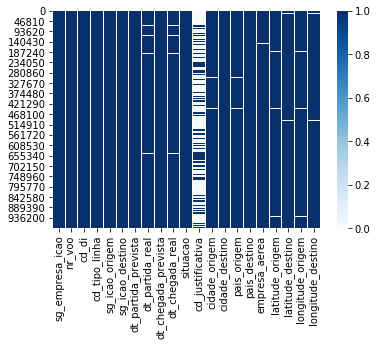

In [14]:
#looking for Nan cells

sns.heatmap(data.notnull(), cmap = 'Blues')

In [15]:
# analisando colunas para possível remoção
# cd == código de autorização
data['cd_di'].unique() #possivel info -- no drop

### icao empresa e icao aeroporto serão dropados
data.drop(columns = ['sg_empresa_icao','sg_icao_origem', 'sg_icao_destino'], inplace = True)

In [16]:
### após pesquisa dos tipos de linha
### trocando valores de código de linha
data['cd_tipo_linha'].unique()
## após pesquisa de significados

data['cd_tipo_linha'] = data['cd_tipo_linha'].apply(lambda x: 'Internacional' if str(x) == 'I' else x)
data['cd_tipo_linha'] = data['cd_tipo_linha'].apply(lambda x: 'Nacional' if x == 'N' else x)
data['cd_tipo_linha'] = data['cd_tipo_linha'].apply(lambda x: 'Cargueiro' if x == 'C' else x)
data['cd_tipo_linha'] = data['cd_tipo_linha'].apply(lambda x: 'Cargueiro internacional' if x == 'G' else x)
data['cd_tipo_linha'] = data['cd_tipo_linha'].apply(lambda x: 'Regional' if x == 'R' else x)
data['cd_tipo_linha'] = data['cd_tipo_linha'].apply(lambda x: 'Rede postal' if x == 'L' else x)
data

,nr_voo,cd_di,cd_tipo_linha,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,situacao,cd_justificativa,cidade_origem,cidade_destino,pais_origem,pais_destino,empresa_aerea,latitude_origem,latitude_destino,longitude_origem,longitude_destino
0,35,0,Internacional,25/01/2019 06:15,25/01/2019 06:15,25/01/2019 18:15,25/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499
1,35,0,Internacional,27/01/2019 06:15,27/01/2019 06:15,27/01/2019 18:15,27/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499
2,35,0,Internacional,29/01/2019 06:15,29/01/2019 06:15,29/01/2019 18:15,29/01/2019 18:15,REALIZADO,NaN,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499
3,36,0,Internacional,25/01/2019 20:15,25/01/2019 20:15,26/01/2019 07:45,26/01/2019 07:45,REALIZADO,NaN,CAMPINAS,PARIS,BRASIL,FRANCA,None,-23.007401,48.723333,-47.134499,2.379444
4,36,0,Internacional,27/01/2019 20:15,27/01/2019 20:15,28/01/2019 07:45,28/01/2019 07:45,REALIZADO,NaN,CAMPINAS,PARIS,BRASIL,FRANCA,None,-23.007401,48.723333,-47.134499,2.379444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982986,1652,0,Nacional,25/12/2019 10:45,25/12/2019 10:54,25/12/2019 12:50,25/12/2019 13:02,REALIZADO,NaN,SÃO PAULO,ILHÉUS,BRASIL,BRASIL,GOL,-23.626110,-14.816000,-46.656387,-39.033199
982987,1633,0,Nacional,31/12/2019 02:45,31/12/2019 02:42,31/12/2019 05:30,31/12/2019 05:39,REALIZADO,NaN,PETROLINA,GUARULHOS,BRASIL,BRASIL,GOL,-9.362410,-23.435556,-40.569099,-46.473057
982988,2013,0,Nacional,06/12/2019 18:55,06/12/2019 19:32,06/12/2019 20:20,06/12/2019 20:52,REALIZADO,RI,NAVEGANTES,RIO DE JANEIRO,BRASIL,BRASIL,GOL,-26.879999,-22.809999,-48.651402,-43.250557
982989,4034,0,Nacional,10/12/2019 17:00,10/12/2019 17:03,10/12/2019 18:50,10/12/2019 18:43,REALIZADO,NaN,RIO DE JANEIRO,BRASÍLIA,BRASIL,BRASIL,GOL,-22.910500,-15.869167,-43.163101,-47.920834


In [22]:
# criando colunas 'dia', 'mes', 'dia da semana', 'ano'
# transformando dados em timestamp

data['dt_chegada_prevista'][~data['dt_chegada_prevista'].isna()] = data['dt_chegada_prevista'][~data['dt_chegada_prevista'].isna()].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M").strftime("%Y-%m-%d %H:%M"))
data['dt_chegada_real'][~data['dt_chegada_real'].isna()] = data['dt_chegada_real'][~data['dt_chegada_real'].isna()].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M").strftime("%Y-%m-%d %H:%M"))
data['dt_partida_prevista'][~data['dt_partida_prevista'].isna()] = data['dt_partida_prevista'][~data['dt_partida_prevista'].isna()].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M").strftime("%Y-%m-%d %H:%M"))
data['dt_partida_real'][~data['dt_partida_real'].isna()] = data['dt_partida_real'][~data['dt_partida_real'].isna()].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M").strftime("%Y-%m-%d %H:%M"))


data['dt_chegada_prevista'] = pd.to_datetime(data['dt_chegada_prevista'])
data['dt_chegada_real'] = pd.to_datetime(data['dt_chegada_real'])
data['dt_partida_prevista'] = pd.to_datetime(data['dt_partida_prevista'])
data['dt_partida_real'] = pd.to_datetime(data['dt_partida_real'])


data['dia'] = pd.to_datetime(data['dt_partida_prevista']).dt.day
data['dia_semana'] = pd.to_datetime(data['dt_partida_prevista']).dt.dayofweek
data['mes'] = pd.to_datetime(data['dt_partida_prevista']).dt.month
data['ano'] = pd.to_datetime(data['dt_partida_prevista']).dt.year
data

C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Matheus\Anaconda3\lib\site-packages\ipy

,nr_voo,cd_di,cd_tipo_linha,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,situacao,cd_justificativa,cidade_origem,...,pais_destino,empresa_aerea,latitude_origem,latitude_destino,longitude_origem,longitude_destino,dia,dia_semana,mes,ano
0,35,0,Internacional,2019-01-25 06:15:00,2019-01-25 06:15:00,2019-01-25 18:15:00,2019-01-25 18:15:00,REALIZADO,NaN,PARIS,...,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499,25.0,4.0,1.0,2019.0
1,35,0,Internacional,2019-01-27 06:15:00,2019-01-27 06:15:00,2019-01-27 18:15:00,2019-01-27 18:15:00,REALIZADO,NaN,PARIS,...,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499,27.0,6.0,1.0,2019.0
2,35,0,Internacional,2019-01-29 06:15:00,2019-01-29 06:15:00,2019-01-29 18:15:00,2019-01-29 18:15:00,REALIZADO,NaN,PARIS,...,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499,29.0,1.0,1.0,2019.0
3,36,0,Internacional,2019-01-25 20:15:00,2019-01-25 20:15:00,2019-01-26 07:45:00,2019-01-26 07:45:00,REALIZADO,NaN,CAMPINAS,...,FRANCA,None,-23.007401,48.723333,-47.134499,2.379444,25.0,4.0,1.0,2019.0
4,36,0,Internacional,2019-01-27 20:15:00,2019-01-27 20:15:00,2019-01-28 07:45:00,2019-01-28 07:45:00,REALIZADO,NaN,CAMPINAS,...,FRANCA,None,-23.007401,48.723333,-47.134499,2.379444,27.0,6.0,1.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982986,1652,0,Nacional,2019-12-25 10:45:00,2019-12-25 10:54:00,2019-12-25 12:50:00,2019-12-25 13:02:00,REALIZADO,NaN,SÃO PAULO,...,BRASIL,GOL,-23.626110,-14.816000,-46.656387,-39.033199,25.0,2.0,12.0,2019.0
982987,1633,0,Nacional,2019-12-31 02:45:00,2019-12-31 02:42:00,2019-12-31 05:30:00,2019-12-31 05:39:00,REALIZADO,NaN,PETROLINA,...,BRASIL,GOL,-9.362410,-23.435556,-40.569099,-46.473057,31.0,1.0,12.0,2019.0
982988,2013,0,Nacional,2019-12-06 18:55:00,2019-12-06 19:32:00,2019-12-06 20:20:00,2019-12-06 20:52:00,REALIZADO,RI,NAVEGANTES,...,BRASIL,GOL,-26.879999,-22.809999,-48.651402,-43.250557,6.0,4.0,12.0,2019.0
982989,4034,0,Nacional,2019-12-10 17:00:00,2019-12-10 17:03:00,2019-12-10 18:50:00,2019-12-10 18:43:00,REALIZADO,NaN,RIO DE JANEIRO,...,BRASIL,GOL,-22.910500,-15.869167,-43.163101,-47.920834,10.0,1.0,12.0,2019.0


In [23]:
# criando coluna de atrasos (TIMESTAMP)
pd.set_option('display.max_columns', None)

data['atraso_chegada_min'] = data['dt_chegada_real']-data['dt_chegada_prevista']
data['atraso_partida_min'] = data['dt_partida_real']-data['dt_partida_prevista']


# transformando colunas de atraso em minutos de atraso

data['atraso_chegada_min'] = data['atraso_chegada_min'].apply(lambda x: x.total_seconds()/60)
data['atraso_partida_min'] = data['atraso_partida_min'].apply(lambda x: x.total_seconds()/60)

data.sort_values(by = 'atraso_chegada_min', ascending = False).head(40)

,nr_voo,cd_di,cd_tipo_linha,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,situacao,cd_justificativa,cidade_origem,cidade_destino,pais_origem,pais_destino,empresa_aerea,latitude_origem,latitude_destino,longitude_origem,longitude_destino,dia,dia_semana,mes,ano,atraso_chegada_min,atraso_partida_min
117752,249,0,Internacional,2019-02-21 08:25:00,2019-02-21 09:11:00,2019-02-21 20:15:00,2019-09-21 20:49:00,REALIZADO,TD,LONDRES,RIO DE JANEIRO,REINO UNIDO,BRASIL,BRITISH AIRWAYS PLC,51.470600,-22.809999,-0.461941,-43.250557,21.0,3.0,2.0,2019.0,305314.0,46.0
434762,7615,0,Cargueiro internacional,2019-06-08 11:00:00,2019-09-08 17:55:00,2019-06-08 12:05:00,2019-09-08 18:58:00,REALIZADO,MX,AMSTERDAM,LUXEMBURGO,HOLANDA,LUXEMBURGO,CARGOLUX AIRLINES,52.308601,49.623333,4.763890,6.204444,8.0,5.0,6.0,2019.0,132893.0,132895.0
34243,1226,0,Nacional,2019-01-02 18:15:00,2019-02-01 18:17:00,2019-01-02 19:55:00,2019-02-01 20:11:00,REALIZADO,AR,SÃO PAULO,PORTO ALEGRE,BRASIL,BRASIL,GOL,-23.626110,-29.994400,-46.656387,-51.171398,2.0,2.0,1.0,2019.0,43216.0,43202.0
482216,248,0,Internacional,2019-06-02 02:55:00,2019-07-01 02:49:00,2019-06-02 16:55:00,2019-07-01 16:25:00,REALIZADO,MX,RIO DE JANEIRO,DUBAI INTERNATIONAL,BRASIL,EMIRADOSARABES UNIDOS,EMIRATES,-22.809999,25.252800,-43.250557,55.364399,2.0,6.0,6.0,2019.0,41730.0,41754.0
758779,9291,0,Nacional,2019-10-16 21:30:00,2019-10-16 21:35:00,2019-10-16 23:10:00,2019-11-07 19:35:00,REALIZADO,HD,BRASÍLIA,CAMPINAS,BRASIL,BRASIL,AZUL,-15.869167,-23.007401,-47.920834,-47.134499,16.0,2.0,10.0,2019.0,31465.0,5.0
408573,35,0,Internacional,2019-06-23 05:15:00,2019-06-30 05:30:00,2019-06-23 17:15:00,2019-06-30 17:26:00,REALIZADO,AI,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499,23.0,6.0,6.0,2019.0,10091.0,10095.0
408572,35,0,Internacional,2019-06-23 05:15:00,2019-06-29 06:27:00,2019-06-23 17:15:00,2019-06-29 18:25:00,REALIZADO,AI,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499,23.0,6.0,6.0,2019.0,8710.0,8712.0
408603,36,0,Internacional,2019-06-23 19:15:00,2019-06-29 20:30:00,2019-06-24 06:45:00,2019-06-30 07:40:00,REALIZADO,RA,CAMPINAS,PARIS,BRASIL,FRANCA,None,-23.007401,48.723333,-47.134499,2.379444,23.0,6.0,6.0,2019.0,8695.0,8715.0
408582,36,0,Internacional,2019-06-01 19:15:00,2019-06-07 19:44:00,2019-06-02 06:45:00,2019-06-08 06:55:00,REALIZADO,MX,CAMPINAS,PARIS,BRASIL,FRANCA,None,-23.007401,48.723333,-47.134499,2.379444,1.0,5.0,6.0,2019.0,8650.0,8669.0
408571,35,0,Internacional,2019-06-23 05:15:00,2019-06-28 07:53:00,2019-06-23 17:15:00,2019-06-28 19:35:00,REALIZADO,MA,PARIS,CAMPINAS,FRANCA,BRASIL,None,48.723333,-23.007401,2.379444,-47.134499,23.0,6.0,6.0,2019.0,7340.0,7358.0


In [24]:
# reordenando colunas

data.columns
data = data.reindex(columns=['nr_voo', 'empresa_aerea', 'cd_tipo_linha', 'cidade_origem', 'cidade_destino', 'pais_origem',
       'pais_destino', 'dt_partida_prevista',
       'dt_partida_real', 'dt_chegada_prevista', 'dt_chegada_real', 'situacao',
       'cd_justificativa', 'dia', 'dia_semana', 'mes',
       'ano', 'atraso_chegada_min', 'atraso_partida_min', 'latitude_origem', 'latitude_destino',
       'longitude_origem', 'longitude_destino', 'cd_di'])

data.head()

,nr_voo,empresa_aerea,cd_tipo_linha,cidade_origem,cidade_destino,pais_origem,pais_destino,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,situacao,cd_justificativa,dia,dia_semana,mes,ano,atraso_chegada_min,atraso_partida_min,latitude_origem,latitude_destino,longitude_origem,longitude_destino,cd_di
0,35,None,Internacional,PARIS,CAMPINAS,FRANCA,BRASIL,2019-01-25 06:15:00,2019-01-25 06:15:00,2019-01-25 18:15:00,2019-01-25 18:15:00,REALIZADO,NaN,25.0,4.0,1.0,2019.0,0.0,0.0,48.723333,-23.007401,2.379444,-47.134499,0
1,35,None,Internacional,PARIS,CAMPINAS,FRANCA,BRASIL,2019-01-27 06:15:00,2019-01-27 06:15:00,2019-01-27 18:15:00,2019-01-27 18:15:00,REALIZADO,NaN,27.0,6.0,1.0,2019.0,0.0,0.0,48.723333,-23.007401,2.379444,-47.134499,0
2,35,None,Internacional,PARIS,CAMPINAS,FRANCA,BRASIL,2019-01-29 06:15:00,2019-01-29 06:15:00,2019-01-29 18:15:00,2019-01-29 18:15:00,REALIZADO,NaN,29.0,1.0,1.0,2019.0,0.0,0.0,48.723333,-23.007401,2.379444,-47.134499,0
3,36,None,Internacional,CAMPINAS,PARIS,BRASIL,FRANCA,2019-01-25 20:15:00,2019-01-25 20:15:00,2019-01-26 07:45:00,2019-01-26 07:45:00,REALIZADO,NaN,25.0,4.0,1.0,2019.0,0.0,0.0,-23.007401,48.723333,-47.134499,2.379444,0
4,36,None,Internacional,CAMPINAS,PARIS,BRASIL,FRANCA,2019-01-27 20:15:00,2019-01-27 20:15:00,2019-01-28 07:45:00,2019-01-28 07:45:00,REALIZADO,NaN,27.0,6.0,1.0,2019.0,0.0,0.0,-23.007401,48.723333,-47.134499,2.379444,0


In [25]:
# FUNÇÃO PARA TRANSFORMAR MES E DIA DA SEMANA NUMERICO PARA STRING (EM PORTUGUES)

def mes(x):
    if x == 1:
        return '01 - Janeiro'
    elif x == 2:
        return '02 - Fevereiro'
    elif x == 3:
        return '03 - Março'
    elif x == 4:
        return '04 - Abril'
    elif x == 5:
        return '05 - Maio'
    elif x == 6:
        return '06 - Junho'
    elif x == 7:
        return '07 - Julho'
    elif x == 8:
        return '08 - Agosto'    
    elif x == 9:
        return '09 - Setembro'
    elif x == 10:
        return '10 - Outubro'
    elif x == 11:
        return '11 - Novembro'
    elif x == 12:
        return '12 - Dezembro'
        
def diasemana(x):
    if x == 0:
        return '2 - Segunda'
    elif x == 1:
        return '3 - Terça'
    elif x == 2:
        return '4 - Quarta'
    elif x == 3:
        return '5 - Quinta'
    elif x == 4:
        return '6 - Sexta'
    elif x == 5:
        return '7 - Sábado'
    elif x == 6:
        return '1 - Domingo'
    
data['mes'] = data['mes'].apply(lambda x: mes(x))
data['dia_semana'] = data['dia_semana'].apply(lambda x: diasemana(x))
data.head()

,nr_voo,empresa_aerea,cd_tipo_linha,cidade_origem,cidade_destino,pais_origem,pais_destino,dt_partida_prevista,dt_partida_real,dt_chegada_prevista,dt_chegada_real,situacao,cd_justificativa,dia,dia_semana,mes,ano,atraso_chegada_min,atraso_partida_min,latitude_origem,latitude_destino,longitude_origem,longitude_destino,cd_di
0,35,None,Internacional,PARIS,CAMPINAS,FRANCA,BRASIL,2019-01-25 06:15:00,2019-01-25 06:15:00,2019-01-25 18:15:00,2019-01-25 18:15:00,REALIZADO,NaN,25.0,6 - Sexta,01 - Janeiro,2019.0,0.0,0.0,48.723333,-23.007401,2.379444,-47.134499,0
1,35,None,Internacional,PARIS,CAMPINAS,FRANCA,BRASIL,2019-01-27 06:15:00,2019-01-27 06:15:00,2019-01-27 18:15:00,2019-01-27 18:15:00,REALIZADO,NaN,27.0,1 - Domingo,01 - Janeiro,2019.0,0.0,0.0,48.723333,-23.007401,2.379444,-47.134499,0
2,35,None,Internacional,PARIS,CAMPINAS,FRANCA,BRASIL,2019-01-29 06:15:00,2019-01-29 06:15:00,2019-01-29 18:15:00,2019-01-29 18:15:00,REALIZADO,NaN,29.0,3 - Terça,01 - Janeiro,2019.0,0.0,0.0,48.723333,-23.007401,2.379444,-47.134499,0
3,36,None,Internacional,CAMPINAS,PARIS,BRASIL,FRANCA,2019-01-25 20:15:00,2019-01-25 20:15:00,2019-01-26 07:45:00,2019-01-26 07:45:00,REALIZADO,NaN,25.0,6 - Sexta,01 - Janeiro,2019.0,0.0,0.0,-23.007401,48.723333,-47.134499,2.379444,0
4,36,None,Internacional,CAMPINAS,PARIS,BRASIL,FRANCA,2019-01-27 20:15:00,2019-01-27 20:15:00,2019-01-28 07:45:00,2019-01-28 07:45:00,REALIZADO,NaN,27.0,1 - Domingo,01 - Janeiro,2019.0,0.0,0.0,-23.007401,48.723333,-47.134499,2.379444,0


In [26]:
data.to_csv('flights_brazil_2019.csv', index = False, compression = 'gzip')